In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent))

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mamasight import ScreenParser
from mamasight.version import __version__

print(f"MamaSight version: {__version__}")

MamaSight version: 0.1.0


In [3]:
# Initialize parser with custom settings and model path
box_config = {
    'box_overlay_ratio': 3200,  # Base ratio for scaling
    'text_scale': 1.0,          # Larger text
    'text_thickness': 3,        # Thicker text
    'text_padding': 5,          # More padding around text
    'thickness': 4,             # Thicker boxes
    'annotation_style': 'simple',  # 'simple' or 'colorful'
}

# Specify a custom directory for model weights (replace with your preferred path)
custom_weights_path = "./model_weights"

# Initialize parser with custom weights path
parser = ScreenParser(box_config=box_config, weights_path=custom_weights_path)

# Setup - adjust device as needed ('cuda' or 'cpu')
parser.setup(yolo_device='cpu', ocr_device='cpu')  # Use 'cuda' if you have a GPU

Found existing YOLO model at model_weights/icon_detect/model.pt, skipping download.
Using YOLO model at model_weights/icon_detect/model.pt


/Users/pouria/Documents/Coding/MamaSight/mamasight-env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


YOLO model loaded on CPU
Setting up OCR on device: cpu
Initializing PaddleOCR...
[2025/02/21 14:11:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='model_weights/ocr_models/det', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=True, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='model_weights/ocr_models/rec', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_

True

Image loaded (2936x1836). Timer started!

0: 800x1280 59 icons, 867.2ms
Speed: 8.9ms preprocess, 867.2ms inference, 4.0ms postprocess per image at shape (1, 3, 800, 1280)
YOLO detection completed in 1.57 seconds
Found 59 icons/UI elements
Image annotation completed with 59 elements.
Image annotation completed in 0.01 seconds
Total analysis time: 1.59 seconds
Analysis complete: Found 59 total elements in image
Analysis completed in 1.63 seconds


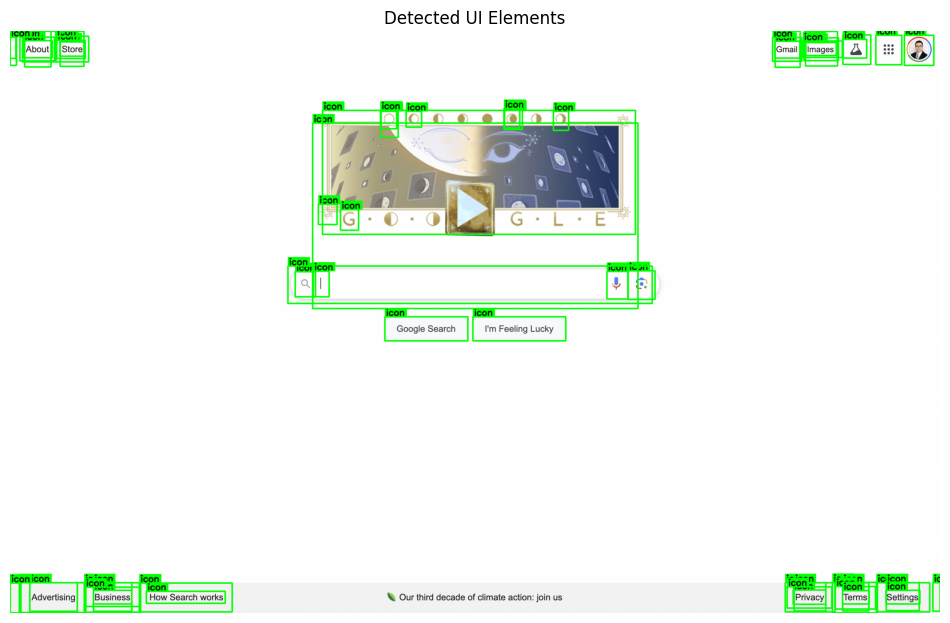

Total elements detected: 59

Detection types:
box_type
icon    59
Name: count, dtype: int64

First few detections:


,box_id,box_type,content,bbox,confidence,interactivity,source,ID
0,icon_0,icon,None,"[0.4977957494252384, 0.4912711415675211, 0.597...",0.798513,True,yolo,0
1,icon_1,icon,None,"[0.40323412320919194, 0.4911295905352158, 0.49...",0.768828,True,yolo,1
2,icon_2,icon,None,"[0.30671301069961254, 0.4136774399701287, 0.32...",0.767793,True,yolo,2
3,icon_3,icon,None,"[0.9310301902833362, 0.007176318199805964, 0.9...",0.694840,True,yolo,3
4,icon_4,icon,None,"[0.96184911909805, 0.007438030118256613, 0.993...",0.668511,True,yolo,4


Annotated image saved to annotated_output.png
Annotated image saved to: annotated_output.png


Bad pipe message: %s [b"\xabo\x8f\xf11\xf6\xb2\xaf'M\x1b5\x16,\xfd\xa1\x1c\xed \xea\x05\x7f}}\xc0r\x0b\xc4h!\x1d\r)\x16\xbe\x8ay\xcc\x04v>\xfcP\xba\xf4\xde)\x96\x14B\xc2\x00 \x1a\x1a\x13\x01\x13\x02\x13\x03\xc0+\xc0/\xc0,\xc00\xcc\xa9\xcc\xa8\xc0\x13\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x06s\n\n\x00\x00\x00\x0b\x00\x02\x01\x00\x00\n\x00\x0c\x00\n\xfa\xfa\x11\xec\x00\x1d\x00\x17\x00\x18\x00\x1b\x00\x03\x02\x00\x02\x00\r\x00\x12\x00\x10\x04\x03\x08\x04\x04\x01\x05\x03\x08\x05\x05\x01\x08\x06\x06\x01Di\x00\x05\x00\x03\x02h2\x00\x10\x00\x0e\x00\x0c\x02h2\x08http/1"]
Bad pipe message: %s [b'\xff\x01\x00\x01\x00\xfe\r\x00\xfa\x00\x00\x01\x00\x01\xcc\x00 \x9c\xf1\xed\xe1h\xa5\xfd\xbbL\x05F|wNM.[\x18qY\xd1\x9e\x07|8\xda\x1c\xb6', b'y\x02\x00\xd0\x80"\xdbT\x11\xec\xa9Y\xf5h\x04v\xb9\x87\x1a,\xae\x13\xc5\x05C\x89{\x86.\xb1\n\xca\xb0\xc53-\xa4\xb2\xaf\xe3^\xb4\xbc\t\xf9\x04~\xf8zf\xc9\xb9&\xdfl\xdeu5\xf2\\\x93;\x9e8\xe1\xa0\x11?(\xd4\xf6U\xb3\x8b\xc5\x1cF\xbbc\x1a\xd7L\xe49\r-W\x9f\xb0\x03\x

In [4]:
# Path to test image - replace with actual path to your test image
test_image_path = 'test_image.png'

# Analyze image without OCR
start_time = time.time()
image, detections = parser.analyze(test_image_path, use_ocr=False)
print(f"Analysis completed in {time.time() - start_time:.2f} seconds")

# Display the image
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis('off')
plt.title('Detected UI Elements')
plt.show()

# Display detection statistics
print(f"Total elements detected: {len(detections)}")
if not detections.empty:
    print("\nDetection types:")
    print(detections['box_type'].value_counts())
    
    print("\nFirst few detections:")
    display(detections.head())

# Save the annotated image
output_path = "annotated_output.png"
parser.save_annotated_image(image, output_path)
print(f"Annotated image saved to: {output_path}")